# PROBLEM STATEMENT

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


#### What is Train and Test

In ML, Train and test simply means a way to create and test a model.

1. Creation of model is done using training data and the reason why it is called train is because train set contains predictors
   as well as target variable.
2. Where as the test set has all the predictor variables however, the target is not given because in test case, we wish to        predict the target.
3. The no of columns in train set are'n'and in test set it is 'n-1'.

In [247]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns  #dta visualisation

In [248]:
#Importing the dataset
train = pd.read_csv("train_kOBLwZa.csv")
test = pd.read_csv("test_t02dQwI.csv")

In [249]:
#PREVIEW THE DATASET
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [250]:
test.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [251]:
#shape of the data
train.shape, test.shape

((8523, 12), (5681, 11))

In [252]:
train.columns #list of columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [253]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [254]:
#Info of data set,here in output if it is showing object then is is categorical type data otherwise it is numerical data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [255]:
# Count of missing values
train.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False,False,True,False,False,False


In [256]:
train.isnull().sum()[train.isnull().sum()!= 0] #it will show the output where mising value is present.

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [257]:
test.isnull().sum()[train.isnull().sum()!= 0]

Item_Weight     976
Outlet_Size    1606
dtype: int64

# UNIVARIATE ANALYSIS

In [258]:
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


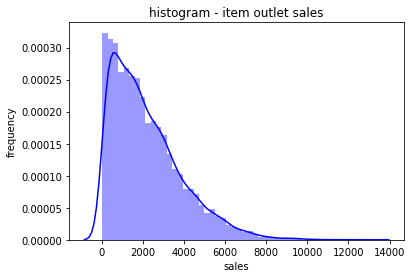

In [259]:
#target variable item_outlet_sales
#since it is numerical ,we will create a histogram
sns.distplot(train["Item_Outlet_Sales"],color = "blue")
plt.xlabel("sales")
plt.ylabel("frequency")
plt.title("histogram - item outlet sales")
plt.show()

##### Inference
1. Sales appers to be skewed which means that there is a presence of outlier in the data.
2. In positively skewed data,mean>median>mode and reverse for -vely skewed data.

In [260]:
train.Item_Outlet_Sales.mean()

2181.2889135750365

In [261]:
train.Item_Outlet_Sales.median()

1794.3310000000001

In [262]:
train.Item_Outlet_Sales.mode()

0    958.752
dtype: float64

In [263]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

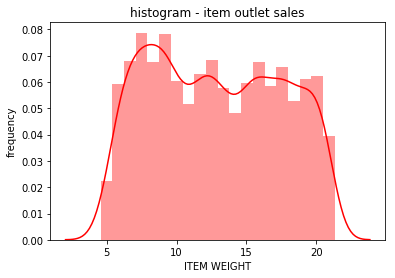

In [264]:
#Item Weight
sns.distplot(train["Item_Weight"].dropna(),color = "red")
plt.xlabel("ITEM WEIGHT")
plt.ylabel("frequency")
plt.title("histogram - item outlet sales")
plt.show()

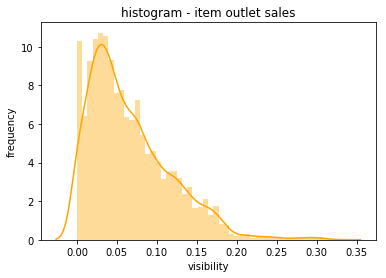

In [265]:
# Item visibility
sns.distplot(train["Item_Visibility"],color = "orange")
plt.xlabel("visibility")
plt.ylabel("frequency")
plt.title("histogram - item outlet sales")
plt.show()

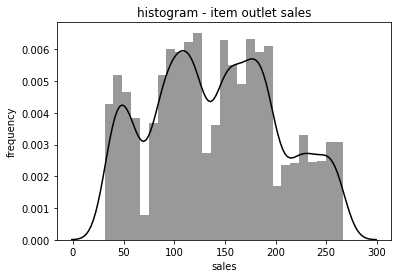

In [266]:
# Item MRP
sns.distplot(train["Item_MRP"],color = "BLACK")
plt.xlabel("sales")
plt.ylabel("frequency")
plt.title("histogram - item outlet sales")
plt.show()

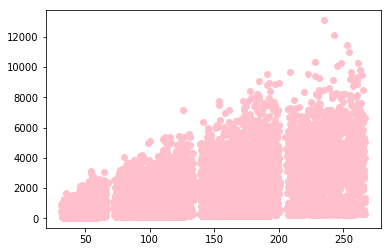

In [267]:
plt.scatter(train.Item_MRP,train.Item_Outlet_Sales, color = "pink")

# Univariate analysis for categorical columns

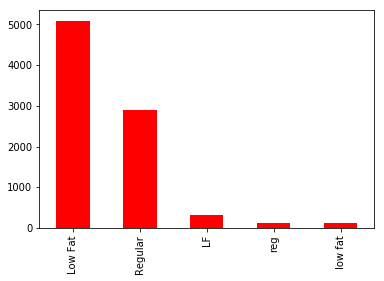

In [268]:
train.Item_Fat_Content.value_counts().plot(kind = "bar", color = "red")

In [269]:
train.Item_Fat_Content.replace(to_replace=["LF","low fat"],value=["Low Fat"]*2, inplace = True)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [270]:
train.Item_Fat_Content.replace(to_replace=["reg"],value=["Regular"], inplace = True)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [271]:
test.Item_Fat_Content.replace(to_replace=["LF","low fat"],value=["Low Fat"]*2, inplace = True)
test.Item_Fat_Content.replace(to_replace=["reg"],value=["Regular"], inplace = True)
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


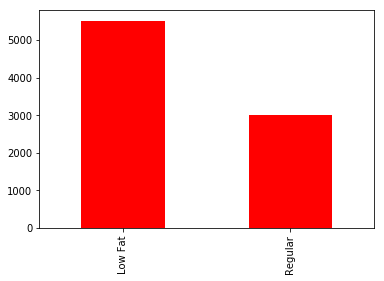

In [272]:
train.Item_Fat_Content.value_counts().plot(kind = "bar", color = "red")

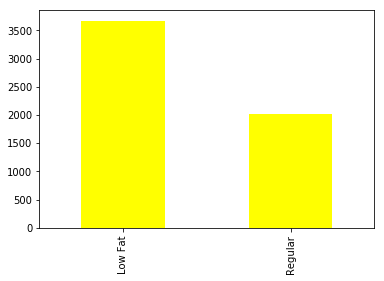

In [273]:
test.Item_Fat_Content.value_counts().plot(kind = "bar", color = "yellow")

In [274]:
#Combining the dataset
combined = pd.concat([train,test],sort = False, ignore_index = True)

In [275]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

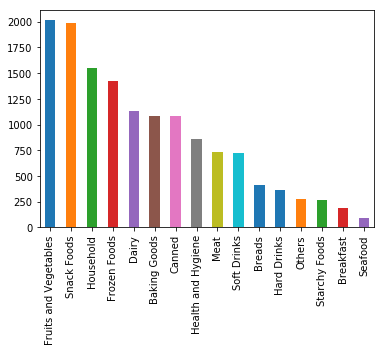

In [276]:
combined.Item_Type.value_counts().plot(kind = "bar")

In [277]:
combined.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

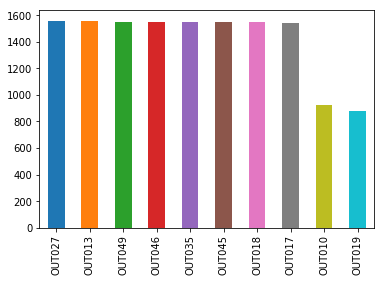

In [278]:
combined.Outlet_Identifier.value_counts().plot(kind = "bar")

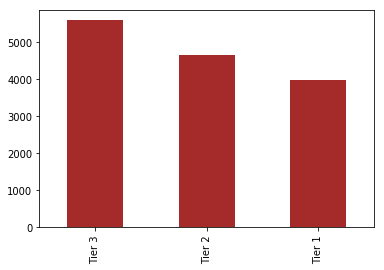

In [279]:
combined.Outlet_Location_Type.value_counts().plot(kind = "bar", color = "brown")

In [280]:
combined.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [ ]:
combined.Outlet_Type.value_counts().plot(kind="bar")

# SUMMARY - univariate Analysis
1.Sales is skewed because of presence of outliners.
2.Item weight has lots of missing values and shows no pattern in histogram.
3.Item MRP shows 04 data distributions.Need to explore more.
4.There are two types pf products sold - regular and low fat.
5.Item visibility has lots of 0 values- Need to treat this and it is skewed which means that there are products which have
  higher visibility in comparison to others.
6.Outlet size is mostly "Medium" wherein th type of outlets is"S1" and most of the cities where these stores are opened are
  "Tier 3" cities.
7.The top 5 products that sell in these stores are fruits and vegetables,snacks foods,dairy,frozen food folowed by household items. 

# BIVARIATE ANALYSIS- NUMERICAL vs NUMERICAL

In [282]:
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


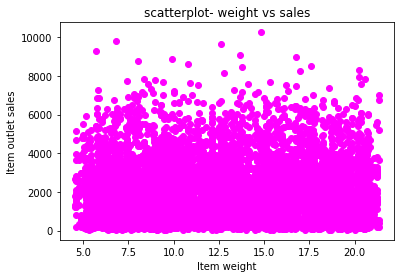

In [283]:
#Item weight vs sales
plt.scatter(combined.Item_Weight,combined.Item_Outlet_Sales, color = "Magenta")
plt.xlabel("Item weight")
plt.ylabel("Item outlet sales")
plt.title("scatterplot- weight vs sales")
plt.show()

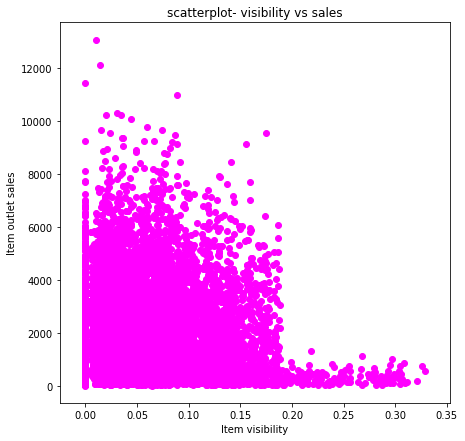

In [284]:
#Item visibility vs sales
plt.figure(figsize =[7,7])
plt.scatter(combined.Item_Visibility,combined.Item_Outlet_Sales, color = "Magenta")
plt.xlabel("Item visibility")
plt.ylabel("Item outlet sales")
plt.title("scatterplot- visibility vs sales")
plt.show()

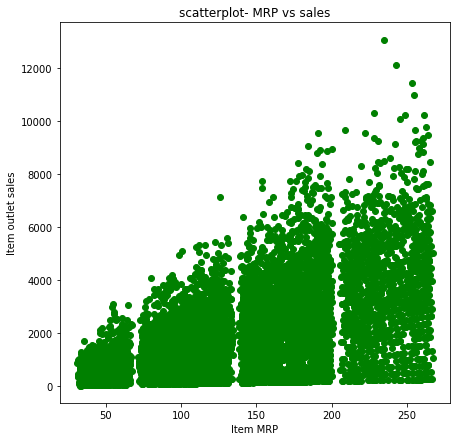

In [285]:
#Item mrp vs sales
plt.figure(figsize = [7,7])
plt.scatter(combined.Item_MRP,combined.Item_Outlet_Sales, color = "GREEN")
plt.xlabel("Item MRP")
plt.ylabel("Item outlet sales")
plt.title("scatterplot- MRP vs sales")
plt.show()

# BIVARIATE ANALYSIS - Categorical VS NUMERICAL

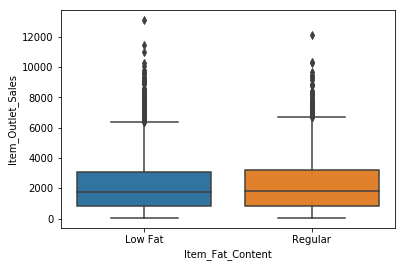

In [286]:
#Item Fat content vs sales
sns.boxplot(x = "Item_Fat_Content",y = "Item_Outlet_Sales",data =combined)

In [287]:
combined.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


Text(0.5, 1.0, 'boxplot item_type vs outlet_sales')

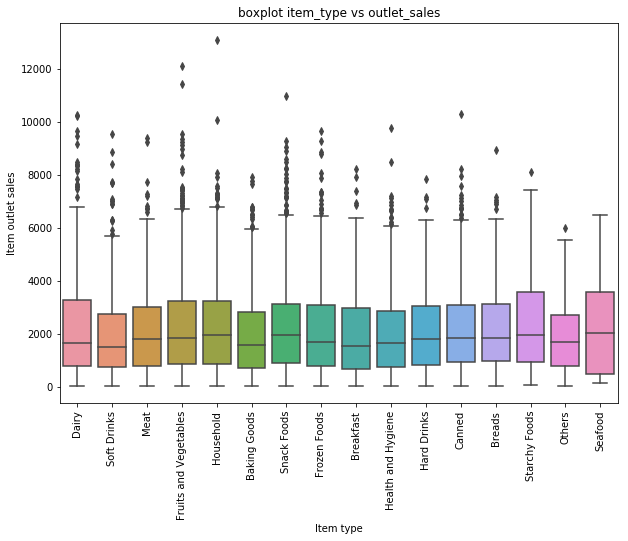

In [288]:
#Item type vs Sales
plt.figure(figsize = [10,7])
sns.boxplot(x = "Item_Type",y = "Item_Outlet_Sales",data =combined)
plt.xticks(rotation = 90)
plt.xlabel("Item type")
plt.ylabel("Item outlet sales")
plt.title("boxplot item_type vs outlet_sales")

In [289]:
#statistical summary of all products
combined.groupby("Item_Type")["Item_Outlet_Sales"].describe().T

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,648.000000,251.000000,110.000000,649.000000,682.000000,856.000000,1232.000000,214.000000,520.000000,910.000000,425.000000,169.000000,64.000000,1200.000000,445.000000,148.000000
mean,1952.971207,2204.132226,2111.808651,2225.194904,2232.542597,2132.867744,2289.009592,2139.221622,2010.000265,2258.784300,2158.977911,1926.139702,2326.065928,2277.321739,2006.511735,2374.332773
std,1546.788045,1644.235914,1911.693586,1645.235638,1884.404698,1724.777720,1799.503459,1606.191587,1553.633063,1692.245757,1695.231081,1431.860471,1842.988719,1705.121755,1674.249752,1773.945328
min,37.284800,35.287400,39.948000,37.950600,40.613800,36.619000,45.274400,37.950600,34.621600,33.290000,47.937600,39.948000,149.805000,33.955800,33.290000,58.590400
25%,705.082200,968.739000,679.116000,952.094000,788.973000,808.947000,884.848200,834.913200,758.845550,853.389150,782.980800,790.970400,473.383800,918.804000,771.662200,958.752000
50%,1577.946000,1860.245200,1554.643000,1860.245200,1650.851100,1687.137200,1830.950000,1816.635300,1669.493500,1981.420800,1829.618400,1713.769200,2055.324600,1944.136000,1518.024000,1968.104800
75%,2823.824250,3145.905000,2970.300250,3101.296400,3296.209350,3079.491450,3227.132600,3071.335400,2884.578500,3236.786700,3036.048000,2719.793000,3589.327800,3143.574700,2759.075200,3592.656800
max,7931.675400,8958.339000,8209.314000,10306.584000,10256.649000,9678.068800,12117.560000,7843.124000,9779.936200,13086.964800,9390.443200,6008.845000,6503.534400,10993.689600,9554.230000,8132.081200


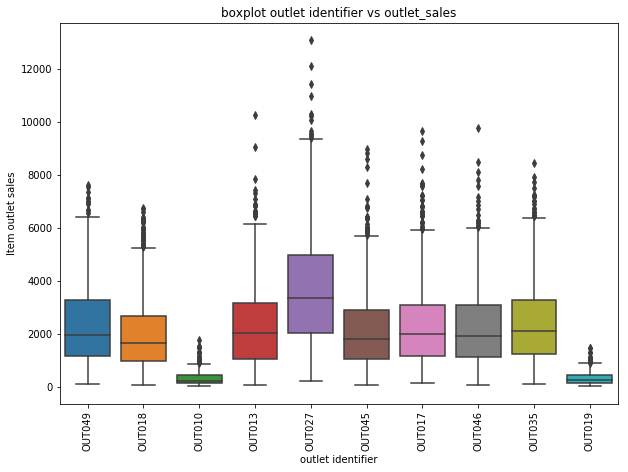

In [290]:
#OUTLET IDENTIFIER vs Sales
plt.figure(figsize = [10,7])
sns.boxplot(x = "Outlet_Identifier",y = "Item_Outlet_Sales",data =combined)
plt.xticks(rotation = 90)
plt.xlabel("outlet identifier")
plt.ylabel("Item outlet sales")
plt.title("boxplot outlet identifier vs outlet_sales")
plt.show()

In [291]:
combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe().T

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
count,555.000000,932.000000,926.000000,928.000000,528.000000,935.000000,930.000000,929.000000,930.000000,930.000000
mean,339.351662,2298.995256,2340.675263,1995.498739,340.329723,3694.038558,2438.841866,2192.384798,2277.844267,2348.354635
std,271.014855,1533.531664,1550.778025,1375.932889,249.979449,2127.760054,1538.512533,1462.399658,1488.405631,1513.289464
min,33.290000,73.238000,143.812800,69.243200,33.955800,241.685400,113.851800,99.870000,101.867400,111.854400
25%,154.132700,1072.603800,1195.943250,981.555650,153.633350,2044.338900,1238.887350,1068.609000,1137.186400,1182.793700
50%,250.340800,2050.664000,2005.056700,1655.178800,265.321300,3364.953200,2109.254400,1834.944800,1945.800500,1966.107400
75%,455.407200,3166.378350,3096.469350,2702.648650,460.733600,4975.523400,3310.357600,2929.520000,3095.637100,3281.728200
max,1775.688600,10256.649000,9664.752800,6768.522800,1482.070800,13086.964800,8479.628800,8994.958000,9779.936200,7646.047200


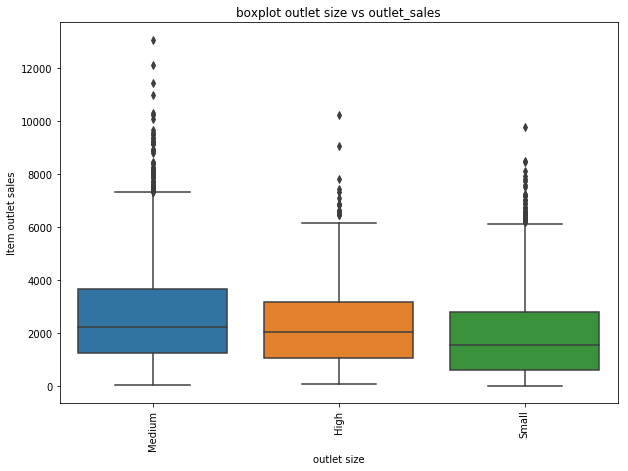

In [292]:
#OUTLET size vs Sales
plt.figure(figsize = [10,7])
sns.boxplot(x = "Outlet_Size",y = "Item_Outlet_Sales",data =combined)
plt.xticks(rotation = 90)
plt.xlabel("outlet size")
plt.ylabel("Item outlet sales")
plt.title("boxplot outlet size vs outlet_sales")
plt.show()

In [293]:
pd.DataFrame(combined.groupby("Outlet_Size")["Outlet_Identifier"].value_counts()).T

Outlet_Size         High Medium                Small              
Outlet_Identifier OUT013 OUT027 OUT049 OUT018 OUT035 OUT046 OUT019
Outlet_Identifier   1553   1559   1550   1546   1550   1550    880

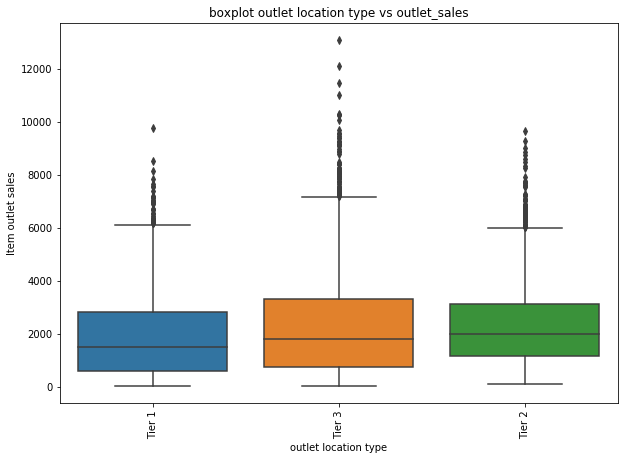

In [294]:
#OUTLET_location_type size vs Sales
plt.figure(figsize = [10,7])
sns.boxplot(x = "Outlet_Location_Type",y = "Item_Outlet_Sales",data =combined)
plt.xticks(rotation = 90)
plt.xlabel("outlet location type")
plt.ylabel("Item outlet sales")
plt.title("boxplot outlet location type vs outlet_sales")
plt.show()

In [295]:
pd.DataFrame(combined.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].value_counts()).T

Outlet_Location_Type     Tier 1                                              \
Item_Outlet_Sales    1342.2528  1438.1280  1416.8224  123.8388   311.5944     
Item_Outlet_Sales             8          7          6          5          5   

Outlet_Location_Type                                                         \
Item_Outlet_Sales    316.9208   703.0848   878.8560   1593.9252  2988.1104    
Item_Outlet_Sales             5          5          5          5          5   

Outlet_Location_Type    ...         Tier 3                                   \
Item_Outlet_Sales       ...     9562.2196  9678.0688  10072.8882 10236.6750   
Item_Outlet_Sales       ...              1          1          1          1   

Outlet_Location_Type                                                         \
Item_Outlet_Sales    10256.6490 10306.5840 10993.6896 11445.1020 12117.5600   
Item_Outlet_Sales             1          1          1          1          1   

Outlet_Location_Type             
Item_Outlet_Sales    13086.9648  
Item_Outlet_Sales             1  

[1 rows x 5615 columns]

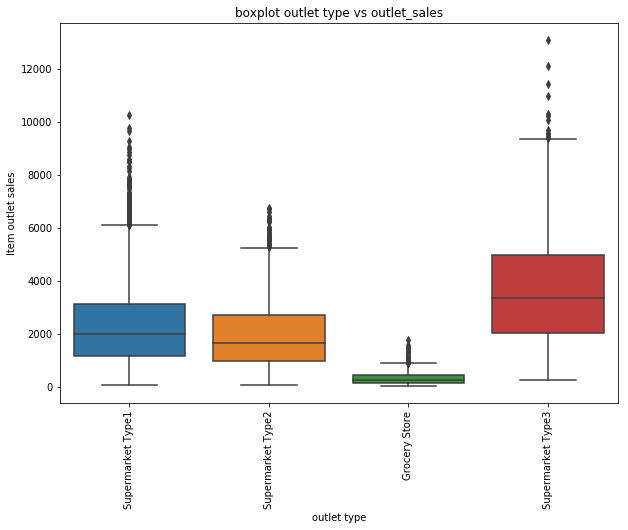

In [296]:
#OUTLET_location_type size vs Sales
plt.figure(figsize = [10,7])
sns.boxplot(x = "Outlet_Type",y = "Item_Outlet_Sales",data =combined)
plt.xticks(rotation = 90)
plt.xlabel("outlet type")
plt.ylabel("Item outlet sales")
plt.title("boxplot outlet type vs outlet_sales")
plt.show()

### Summary -Bivariate analysis
1. Highest performing outlet is outlet 27 mostly based in tier 3 cities and are S3 stores.
2. Higher are visibility, lesser the sales for the items in the store.This is because high visibility shows that the products are large/heavy in nature and hence people are not interested in buying them on a day to day basis. However, the groceries,snacks,fruits and veggies are daily items,although low in  visibility but high in sales.
3. No patern seen in Item Weight vs Sales.
4. Abnormality - A straight line in visibility plot is found at 0 meaning that the sales is happening where the product is not seen/visible. Need to rectify this.
5. Tier 3 cities have better and S3 stores are making most of the money and ofcourse the size is medium. 

# Missing Values and their Imputation

1. Mean/Median Imputaion for Numerical Columns.
2. Mode is used to impute the values wehere the col is categorical.
3. Find out a Pattern- There must be some patern amongst the columns.Hence , its wise to exploit the pattern and use it to your best.
4. Build a machine learning Model to fill the Missing values.

In [297]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

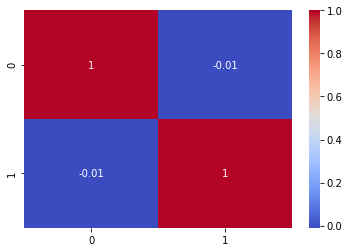

In [298]:
notna = combined.dropna()
sns.heatmap(np.corrcoef(notna.Item_Weight, notna.Item_Visibility),annot = True, cmap='coolwarm')

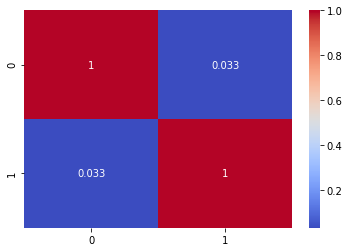

In [299]:
notna = combined.dropna()
sns.heatmap(np.corrcoef(notna.Item_Weight, notna.Item_MRP),annot = True, cmap='coolwarm')

In [300]:
combined["New Weight"]=combined.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [301]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
New Weight                      0
dtype: int64

In [302]:
#Loc ,it is used to fill the missing values in dataset.
train.loc[train.Item_Identifier =="FDA15","Item_Weight"]
train[train.Item_Identifier =="FDA15"]["Item_Weight"] # through this we can see the missing value.

0       9.3
831     9.3
2599    9.3
2643    9.3
4874    9.3
5413    9.3
6696    NaN
7543    9.3
Name: Item_Weight, dtype: float64

step 1:Find the data frame with all null values of weight
step 2:Extract Item IDs and Index Locations.

In [303]:
df = combined[combined.Item_Weight.isnull()]

In [304]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New Weight
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,19.00
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,8.26


In [305]:
#find the weights of fdp10
combined.loc[combined.Item_Identifier=="FDP10",'Item_Weight'].mean()

19.0

In [306]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New Weight
7,FDP10,NaN,Low Fat,0.12747,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,19.0


In [307]:
combined.loc[7,"Item_Weight"]=combined.loc[combined.Item_Identifier=="FDP10",'Item_Weight'].mean()

In [308]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New Weight
7,FDP10,NaN,Low Fat,0.12747,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,19.0


In [309]:
df.shape

(2439, 13)

In [310]:
ids = df.Item_Identifier
locs = df.index

In [311]:
list(ids)[1]

'DRI11'

In [312]:
for i in range(len(ids)):
    combined.loc[locs[i],"Item_Weight"]=combined.loc[combined.Item_Identifier==list(ids)[i],'Item_Weight'].mean()

In [313]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
New Weight                      0
dtype: int64

### FUNCTIONS VS LAMBDA
1. funct are universal in nature and can be used across the scripts and the work we are doing. 
It takes a pie of memory and thats the reason itrs permanebt in the system.
2. 

In [314]:
#Function to cube
def cube(x):
    return(x**3)

cube(4)

64

In [315]:
#USE LAMBDA TO DO THE SAME
g = lambda x:x**3
g(4)

64

In [316]:
list_no = [2,3,4,5,6,7,8,90]

In [317]:
#Using Lambda find the the list of nos which are not even
list(filter(lambda x:x%2!=0, list_no))  #filter(func,data)

[3, 5, 7]

In [318]:
#Train set, find all the sales values which are greater than $2500 using
#Lambda and Filter
list(filter(lambda x:x>2500,train.Item_Outlet_Sales))

[3735.138,
 4022.7636,
 4710.535,
 2748.4224,
 3775.086,
 4064.0432,
 4078.025,
 2741.7644,
 3068.0064,
 3791.0652,
 2797.6916,
 3435.528,
 2527.3768,
 6768.5228,
 5815.0972,
 2576.646,
 3134.5864,
 3121.2704,
 4815.0656,
 6258.52,
 4910.275,
 3185.1872,
 2543.356,
 4865.6664,
 3435.528,
 4604.6728,
 5580.7356,
 5305.0944,
 4693.89,
 3091.9752,
 2716.4640000000004,
 3285.723,
 3755.112,
 4363.6532,
 2854.9504,
 3896.2616,
 3185.853,
 2530.7058,
 2732.4432,
 4097.3332,
 3151.8972,
 5942.265,
 4843.695,
 2542.0244,
 2552.6772,
 3036.048,
 7968.2944,
 6976.2524,
 5262.4832,
 2676.5159999999996,
 7370.406,
 6301.1312,
 2768.3964,
 3169.208,
 3589.9936,
 3315.684,
 2618.5914,
 2769.728,
 5375.0034,
 2838.9712,
 5555.4352,
 3823.0236,
 3969.4996,
 3010.7476,
 6024.1584,
 4739.8302,
 4745.8224,
 3124.5994,
 5070.7328,
 6008.845,
 5359.69,
 3275.736,
 6704.606,
 4119.9704,
 3630.6074,
 5650.6446,
 2636.5679999999998,
 3690.5294,
 3552.7088,
 2956.152,
 3101.2964,
 4769.1254,
 3435.528,
 2603.2

In [319]:
# In train set, find the list of sales where the sales is >2500 & less than 10000.
list(filter(lambda x:x>2500 and x<10000,train.Item_Outlet_Sales))

[3735.138,
 4022.7636,
 4710.535,
 2748.4224,
 3775.086,
 4064.0432,
 4078.025,
 2741.7644,
 3068.0064,
 3791.0652,
 2797.6916,
 3435.528,
 2527.3768,
 6768.5228,
 5815.0972,
 2576.646,
 3134.5864,
 3121.2704,
 4815.0656,
 6258.52,
 4910.275,
 3185.1872,
 2543.356,
 4865.6664,
 3435.528,
 4604.6728,
 5580.7356,
 5305.0944,
 4693.89,
 3091.9752,
 2716.4640000000004,
 3285.723,
 3755.112,
 4363.6532,
 2854.9504,
 3896.2616,
 3185.853,
 2530.7058,
 2732.4432,
 4097.3332,
 3151.8972,
 5942.265,
 4843.695,
 2542.0244,
 2552.6772,
 3036.048,
 7968.2944,
 6976.2524,
 5262.4832,
 2676.5159999999996,
 7370.406,
 6301.1312,
 2768.3964,
 3169.208,
 3589.9936,
 3315.684,
 2618.5914,
 2769.728,
 5375.0034,
 2838.9712,
 5555.4352,
 3823.0236,
 3969.4996,
 3010.7476,
 6024.1584,
 4739.8302,
 4745.8224,
 3124.5994,
 5070.7328,
 6008.845,
 5359.69,
 3275.736,
 6704.606,
 4119.9704,
 3630.6074,
 5650.6446,
 2636.5679999999998,
 3690.5294,
 3552.7088,
 2956.152,
 3101.2964,
 4769.1254,
 3435.528,
 2603.2

In [320]:
list_no

[2, 3, 4, 5, 6, 7, 8, 90]

In [321]:
list(map(lambda x:x**2, list_no))

[4, 9, 16, 25, 36, 49, 64, 8100]

In [322]:
list(map(lambda x:x**2, train.Item_Outlet_Sales)) #map is used to manipulate data by linking it with function.

[13951255.879044,
 196623.77955983998,
 4398541.4529,
 536380.4643999999,
 989438.43490704,
 309813.35623743996,
 118028.52638784,
 16182626.981484963,
 1159064.5455219601,
 22189139.986224998,
 2298336.65190756,
 4783638.245408999,
 2525761.96881316,
 4601915.647097761,
 3910213.585476001,
 2394196.7066886397,
 2630523.27956544,
 516095.97376324,
 5306886.254223999,
 7553825.68882176,
 14251274.307395998,
 16516447.13146624,
 2519417.16419584,
 45962.04303376,
 16630287.900625002,
 703766.632464,
 1134821.4784,
 95438.48633344,
 31838.835103360005,
 15834.749230440002,
 26826.11585424,
 7517272.02510736,
 9412663.270440962,
 4728462.427207841,
 4348416.033567361,
 14372175.35065104,
 7827078.288710561,
 2591792.1771393595,
 150669.27244996,
 4754558.445025,
 11802852.638783999,
 4624796.485156001,
 6387633.48917824,
 45812900.89411984,
 139512.55879044,
 128307.52656016,
 5899255.97331456,
 33815355.44544784,
 6639104.609316001,
 608895.5568697599,
 9825631.89906496,
 724017.87637776,

In [323]:
# Transform


In [1]:
def log_func(x):
    return(np.log(x))

In [2]:
train.Item_Outlet_Sales.apply(lambda x:np.log(x))

NameError: name 'train' is not defined

In [326]:
combined = pd.concat([train,test],sort = False, ignore_index = True)

In [327]:
combined["New_Weight"]=combined.groupby("Item_Identifier")["Item_Weight"].transform(lambda x:x.fillna(x.mean()))

In [328]:
combined.loc[combined.Item_Identifier=='DRI11',["Item_Weight","New_Weight"]]

,Item_Weight,New_Weight
18,NaN,8.26
1366,NaN,8.26
3127,8.26,8.26
5310,8.26,8.26
7022,8.26,8.26
7192,8.26,8.26
8483,8.26,8.26
10246,8.26,8.26
10674,8.26,8.26
12022,8.26,8.26


In [329]:
# drop the column
combined.drop("New_Weight",axis = 1, inplace = True)

In [330]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [331]:
pd.DataFrame(combined.groupby(["Outlet_Identifier","Outlet_Location_Type","Outlet_Type"])["Outlet_Size"].value_counts()).T

Outlet_Identifier,OUT013,OUT018,OUT019,OUT027,OUT035,OUT046,OUT049
Outlet_Location_Type,Tier 3,Tier 3,Tier 1,Tier 3,Tier 2,Tier 1,Tier 1
Outlet_Type,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1
Outlet_Size,High,Medium,Small,Medium,Small,Small,Medium
Outlet_Size,1553,1546,880,1559,1550,1550,1550


In [332]:
df=combined[combined.Outlet_Size.isnull()]

In [333]:
print(df.Outlet_Location_Type.unique())
print(df.Outlet_Type.unique())
print(df.Outlet_Identifier.unique())

['Tier 3' 'Tier 2']
['Grocery Store' 'Supermarket Type1']
['OUT010' 'OUT045' 'OUT017']


In [334]:
combined.loc[(combined.Outlet_Location_Type=="Tier 2")&(combined.Outlet_Type=="Supermarket Type1"),"Outlet_Size"]="Small"

In [335]:
combined[combined.Outlet_Identifier=='OUT010']['Outlet_Type'].unique()

array(['Grocery Store'], dtype=object)

In [336]:
combined.loc[(combined.Outlet_Location_Type=="Tier 3")&(combined.Outlet_Type=="Grocery Store"),"Outlet_Size"]="Small"

In [337]:
combined[combined.Outlet_Identifier=='OUT018']['Outlet_Type'].unique()

array(['Supermarket Type2'], dtype=object)

In [338]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# FEATURE ENGINEERING
1. Outlet_Vintage 2013 - Est Year
2. Item Type - Perisjable/Non Perishable
3. Price_Per_Unit - Item MRP/Item Weight
4. Low fat & Regular - No fat 

In [339]:
combined.shape

(14204, 12)

In [340]:
combined["Outlet_Vintage"]=2013-combined.Outlet_Establishment_Year

In [341]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [342]:
perishables=['Dairy','Meat','Fruits and Vegetables','Breakfast','Canned','Breads','Seafood']

In [343]:
#Function
def perish(x):
    if(x in perishables):
        return("Perishable")
    else:
        return("Non Perishable")
    

In [344]:
combined.Item_Type.apply(perish)

0            Perishable
1        Non Perishable
2            Perishable
3            Perishable
4        Non Perishable
5        Non Perishable
6        Non Perishable
7        Non Perishable
8        Non Perishable
9        Non Perishable
10           Perishable
11           Perishable
12           Perishable
13       Non Perishable
14           Perishable
15           Perishable
16       Non Perishable
17           Perishable
18       Non Perishable
19           Perishable
20       Non Perishable
21       Non Perishable
22       Non Perishable
23       Non Perishable
24       Non Perishable
25       Non Perishable
26       Non Perishable
27       Non Perishable
28           Perishable
29           Perishable
              ...      
14174    Non Perishable
14175        Perishable
14176        Perishable
14177    Non Perishable
14178        Perishable
14179        Perishable
14180        Perishable
14181    Non Perishable
14182    Non Perishable
14183    Non Perishable
14184    Non Per

In [345]:
combined["ItemType_Cat"]=combined.Item_Type.apply(perish)

In [346]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,ItemType_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Perishable
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Non Perishable
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Perishable
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Perishable
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non Perishable


In [347]:
combined["Price_Per_Unit"]=combined.Item_MRP/combined.Item_Weight

In [348]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,ItemType_Cat,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Perishable,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Non Perishable,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Perishable,8.092457
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Perishable,9.484115
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non Perishable,6.031512


In [349]:
combined.Item_Identifier[0][:2]

'FD'

In [350]:
ids = []
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [351]:
combined["ID_Cat"]=pd.Series(ids)

In [352]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,ItemType_Cat,Price_Per_Unit,ID_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Perishable,26.861204,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Non Perishable,8.153581,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Perishable,8.092457,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Perishable,9.484115,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non Perishable,6.031512,NC


In [353]:
pd.DataFrame(combined.groupby("ID_Cat")["Item_Type"].value_counts()).T

ID_Cat             DR                                      FD              \
Item_Type Soft Drinks Hard Drinks Dairy Fruits and Vegetables Snack Foods   
Item_Type         726         362   229                  2013        1989   

ID_Cat                                                                      \
Item_Type Frozen Foods Baking Goods Canned Dairy Meat Breads Starchy Foods   
Item_Type         1426         1086   1084   907  736    416           269   

ID_Cat                             NC                            
Item_Type Breakfast Seafood Household Health and Hygiene Others  
Item_Type       186      89      1548                858    280

In [354]:
combined.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [355]:
combined.Item_Fat_Content.replace(to_replace=['LF',"low fat"],value=["Low fat"]*2, inplace = True)

In [356]:
combined.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [357]:
combined.loc[combined.ID_Cat=="NC","Item_Fat_Content"]="Non Edible"

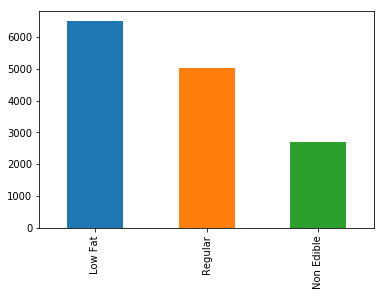

In [358]:
combined.Item_Fat_Content.value_counts().plot(kind = "bar")

In [359]:
combined.drop(["Item_Identifier","Item_Type","Outlet_Establishment_Year"], axis = 1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,ItemType_Cat,Price_Per_Unit,ID_Cat
0,9.300,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14,Perishable,26.861204,FD
1,5.920,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4,Non Perishable,8.153581,DR
2,17.500,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14,Perishable,8.092457,FD
3,19.200,Regular,0.000000,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,15,Perishable,9.484115,FD
4,8.930,Non Edible,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26,Non Perishable,6.031512,NC
5,10.395,Regular,0.000000,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088,4,Non Perishable,4.944762,FD
6,13.650,Regular,0.012741,57.6588,OUT013,High,Tier 3,Supermarket Type1,343.5528,26,Non Perishable,4.224088,FD
7,NaN,Low Fat,0.127470,107.7622,OUT027,Medium,Tier 3,Supermarket Type3,4022.7636,28,Non Perishable,NaN,FD
8,16.200,Regular,0.016687,96.9726,OUT045,Small,Tier 2,Supermarket Type1,1076.5986,11,Non Perishable,5.985963,FD
9,19.200,Regular,0.094450,187.8214,OUT017,Small,Tier 2,Supermarket Type1,4710.5350,6,Non Perishable,9.782365,FD


In [360]:
combined["Item_Visibility"]=combined.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(0, x.median()))

In [361]:
newdata = combined.drop(["Item_Identifier","Item_Type","Outlet_Establishment_Year"], axis = 1)

In [362]:
newdata.shape

(14204, 13)

In [363]:
newdata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,ItemType_Cat,Price_Per_Unit,ID_Cat
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14,Perishable,26.861204,FD
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4,Non Perishable,8.153581,DR
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14,Perishable,8.092457,FD
3,19.20,Regular,0.022914,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,15,Perishable,9.484115,FD
4,8.93,Non Edible,0.013177,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26,Non Perishable,6.031512,NC


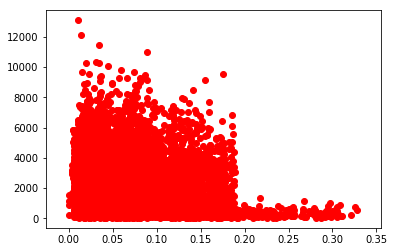

In [364]:
plt.scatter(newdata.Item_Visibility,newdata.Item_Outlet_Sales, color="red")

visibility_new=newdata.pivot_table(values='Item_visibility',index='Item_Identifier')
miss_value_vis=(newdata['Item_Visibility']==0)
newdata.loc['miss_value_vis','Item_Visibility']=newdata.loc['miss_value_vis','Item_Identifier'].apply(lambda x:visibility_new[x])

In [380]:
newdata.Item_Visibility.unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.07352856, 0.08483109,
       0.10472015])

In [366]:
#newdata["Item_Visibility"]=combined.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.fillna(x.mean()))

In [381]:
visibility_avg = combined.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [384]:
#newdata[#"Item_Visibility"]=newdata.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x: x['Item_Visibility']/visibility_new()))
#train['Item_Visibility_Mean']=.apply(lambda x:x['Item_Visibility']/visibility_avg[x['Item_Identifier']],axis=1)

In [ ]:
train.Item_Outlet_Sales.describe()

In [369]:
# 5 point summary max:

q1=np.quantile(train.Item_Outlet_Sales,0.25)
q1
q3=np.quantile(train.Item_Outlet_Sales,0.75)
q3
iqr=q3-q1
iqr

2267.049

In [370]:
L_outlier=q1-1.5*iqr
L_outlier# lower outlier

-2566.3261

In [371]:
u_outlier=q3+1.5*iqr
u_outlier# upper outlier  5 ppoint summary instats

6501.8699

In [372]:
data_without_outleirs=newdata[newdata.Item_Outlet_Sales<=u_outlier].shape# data without outleirs

In [373]:
train[train.Item_Outlet_Sales<u_outlier].shape[0]/train.shape[0]

0.9781766983456529

In [374]:
train[train.Item_Outlet_Sales<L_outlier].shape

(0, 12)

In [386]:
#sns.boxplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=data_without_outleirs)
#plt.show()
newdata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,ItemType_Cat,Price_Per_Unit,ID_Cat
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,14,Perishable,26.861204,FD
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,4,Non Perishable,8.153581,DR
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,14,Perishable,8.092457,FD
3,19.20,Regular,0.022914,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,15,Perishable,9.484115,FD
4,8.93,Non Edible,0.013177,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,26,Non Perishable,6.031512,NC


In [ ]:
## Data pre processing:
#1.encoding
#2.scaling and normalization

In [396]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [401]:
def outlet(x):
    if(x=='OUT027'):
        return("HFO")
    else:
        return("LFO")

In [402]:
newdata.Outlet_Identifier=newdata.Outlet_Identifier.apply(outlet)

In [403]:
newdata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Vintage,ItemType_Cat,Price_Per_Unit,ID_Cat
0,9.30,Low Fat,0.016047,249.8092,LFO,Medium,Tier 1,Supermarket Type1,3735.1380,14,Perishable,26.861204,FD
1,5.92,Regular,0.019278,48.2692,LFO,Medium,Tier 3,Supermarket Type2,443.4228,4,Non Perishable,8.153581,DR
2,17.50,Low Fat,0.016760,141.6180,LFO,Medium,Tier 1,Supermarket Type1,2097.2700,14,Perishable,8.092457,FD
3,19.20,Regular,0.022914,182.0950,LFO,Small,Tier 3,Grocery Store,732.3800,15,Perishable,9.484115,FD
4,8.93,Non Edible,0.013177,53.8614,LFO,High,Tier 3,Supermarket Type1,994.7052,26,Non Perishable,6.031512,NC


In [404]:
ohe=pd.get_dummies(newdata)

In [406]:
ohe.shape

(14204, 26)

In [407]:
ohe.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Vintage', 'Price_Per_Unit', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Non Edible', 'Item_Fat_Content_Regular',
       'Outlet_Identifier_HFO', 'Outlet_Identifier_LFO', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'ItemType_Cat_Non Perishable',
       'ItemType_Cat_Perishable', 'ID_Cat_DR', 'ID_Cat_FD', 'ID_Cat_NC'],
      dtype='object')

In [408]:
#spplit the data back in ORIGINAL train and test
train.shape

(8523, 12)

In [409]:
test.shape

(5681, 11)

In [411]:
#newtrain=ohe.loc[:8522,]
newtrain=ohe.loc[:train.shape[0]-1,]

In [414]:
newtrain.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Vintage,Price_Per_Unit,Item_Fat_Content_Low Fat,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Identifier_HFO,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ItemType_Cat_Non Perishable,ItemType_Cat_Perishable,ID_Cat_DR,ID_Cat_FD,ID_Cat_NC
0,9.30,0.016047,249.8092,3735.1380,14,26.861204,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,5.92,0.019278,48.2692,443.4228,4,8.153581,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,17.50,0.016760,141.6180,2097.2700,14,8.092457,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,19.20,0.022914,182.0950,732.3800,15,9.484115,0,0,1,0,...,1,1,0,0,0,0,1,0,1,0
4,8.93,0.013177,53.8614,994.7052,26,6.031512,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1


In [412]:
newtest=ohe.loc[train.shape[0]:ohe.shape[0],]

In [413]:
newtest.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Vintage,Price_Per_Unit,Item_Fat_Content_Low Fat,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Identifier_HFO,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ItemType_Cat_Non Perishable,ItemType_Cat_Perishable,ID_Cat_DR,ID_Cat_FD,ID_Cat_NC
8523,20.750,0.007565,107.8622,NaN,14,5.198178,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
8524,8.300,0.038428,87.3198,NaN,6,10.520458,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
8525,14.600,0.099575,241.7538,NaN,15,16.558479,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
8526,7.315,0.015388,155.0340,NaN,6,21.193985,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
8527,NaN,0.118599,234.2300,NaN,28,NaN,0,0,1,1,...,1,0,0,0,1,0,1,0,1,0


In [422]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [424]:

scales=pd.DataFrame(sc.fit_transform(ohe),columns=ohe.columns)
scales.describe()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Vintage,Price_Per_Unit,Item_Fat_Content_Low Fat,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Identifier_HFO,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,ItemType_Cat_Non Perishable,ItemType_Cat_Perishable,ID_Cat_DR,ID_Cat_FD,ID_Cat_NC
count,1.176500e+04,1.420400e+04,1.420400e+04,8.523000e+03,1.420400e+04,1.176500e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,...,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04,1.420400e+04
mean,-2.569602e-16,9.176301e-18,-1.331580e-16,1.638435e-16,6.924825e-17,2.767772e-17,-2.592969e-16,-1.680029e-16,-9.198187e-17,4.171465e-16,...,3.081799e-16,5.775989e-16,7.567244e-16,-5.961860e-16,4.171465e-16,-5.349455e-17,5.349455e-17,-6.312811e-16,-3.612524e-16,-1.680029e-16
std,1.000043e+00,1.000035e+00,1.000035e+00,1.000059e+00,1.000035e+00,1.000043e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,...,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.770704e+00,-1.404802e+00,-1.767181e+00,-1.258790e+00,-1.334228e+00,-1.381805e+00,-9.184107e-01,-4.829081e-01,-7.392120e-01,-3.511265e-01,...,-8.047389e-01,-3.815446e-01,-1.375817e+00,-3.494799e-01,-3.511265e-01,-1.228634e+00,-8.139123e-01,-3.196811e-01,-1.596352e+00,-4.829081e-01
25%,-8.775982e-01,-7.780862e-01,-7.569166e-01,-7.894057e-01,-7.369545e-01,-7.395686e-01,-9.184107e-01,-4.829081e-01,-7.392120e-01,-3.511265e-01,...,-8.047389e-01,-3.815446e-01,-1.375817e+00,-3.494799e-01,-3.511265e-01,-1.228634e+00,-8.139123e-01,-3.196811e-01,-1.596352e+00,-4.829081e-01
50%,-4.145348e-02,-2.481188e-01,2.000528e-02,-2.267687e-01,-1.396807e-01,-2.253630e-01,-9.184107e-01,-4.829081e-01,-7.392120e-01,-3.511265e-01,...,-8.047389e-01,-3.815446e-01,7.268410e-01,-3.494799e-01,-3.511265e-01,8.139123e-01,-8.139123e-01,-3.196811e-01,6.264284e-01,-4.829081e-01
75%,8.505775e-01,5.483776e-01,7.224096e-01,5.391513e-01,1.293777e+00,4.412181e-01,1.088837e+00,-4.829081e-01,1.352792e+00,-3.511265e-01,...,1.242639e+00,-3.815446e-01,7.268410e-01,-3.494799e-01,-3.511265e-01,8.139123e-01,1.228634e+00,-3.196811e-01,6.264284e-01,-4.829081e-01
max,1.839335e+00,5.183449e+00,2.027606e+00,6.391045e+00,1.532686e+00,4.712170e+00,1.088837e+00,2.070787e+00,1.352792e+00,2.847976e+00,...,1.242639e+00,2.620926e+00,7.268410e-01,2.861395e+00,2.847976e+00,8.139123e-01,1.228634e+00,3.128117e+00,6.264284e-01,2.070787e+00
